#**#2025 Trade War Impact Case Study**

### Overview
In this case study, I will analyze how companies across various sectors were affected by a trade war initiated by the Trump administration in early 2025. I will examine market data from Bloomberg Professional to identify patterns, assess vulnerabilities, and develop strategies for portfolio managers facing geopolitical trade tensions.

### The Dataset
The provided spreadsheet (20250210_US_Port.xlsx) contains data for 1,594 companies with 36 columns including:
- Ticker information and company names
- Market capitalization and sector classifications (GICS and BICS)
- Valuation metrics (P/E, P/B, P/S ratios)
- Factor exposures across 10 dimensions (Size, Profitability, Volatility, etc.)
- Trading statistics and performance metrics
- ESG disclosure scores
- Employee counts (current and 5 years prior)

### Requirements

1. **Data Cleaning & Preprocessing **
   - Address missing values appropriately
   - Standardize ticker symbols for consistency
   - Join market data with price information
   - Document all data cleaning steps

2. **Trade War Timeline Research **
   - Use the provided timeline of tariff announcements and implementations
   - Research additional details as needed for context
   - Create a structured timeline dataset for visualization

3. **Data Analysis **
   - Analyze sector and industry-level performance during the trade war period
   - Examine relationships between company characteristics and market reactions
   - Investigate at least one unique analysis angle beyond the core approaches
   - Draw meaningful insights about which business models demonstrated resilience

4. **Data Visualization **
   - Create 6 or more clear, informative visualizations that tell a cohesive story
   - Ensure proper labeling, scaling, and color schemes
   - Acceptable tools: Python (Matplotlib/Seaborn), Excel, or Tableau

5. **Comprehensive Conclusion **
   - Synthesize findings across all visualizations into a coherent narrative
   - Explain the "story" revealed by your data analysis
   - Connect different elements of your analysis to form actionable insights
   - Provide specific recommendations for portfolio managers


### Core Analysis Approaches (Include most of these)
1. **Market Capitalization Distribution**: Analyze market cap by sector/industry
2. **Price Charts with Events**: Show market reaction to trade war events (SPY and/or sector indices)
3. **Sector/Industry Performance**: Compare returns across different sectors and industries
4. **Risk-Return Relationships**: Examine beta vs. returns during the trade war period
5. **Factor Exposure Analysis**: Investigate which factor exposures correlated with better/worse performance
6. **Comprehensive Synthesis**: Connect your findings to create an integrated narrative about which business characteristics provided resilience

### Additional Analysis Angles (At least one)
- **Sub-Industry Deep Dive**: Analyze performance variations within a specific sector (e.g., different financial industries)
- **ESG Impact**: Did companies with higher ESG disclosure scores show different reactions to the trade war?
- **Employment Analysis**: How did the trade war affect companies based on their U.S. employment numbers?
- **Supply Chain Exposure**: Can you categorize companies by their global supply chain vulnerability?
- **R&D Intensity**: Did companies with higher R&D spending as a percentage of sales demonstrate different resilience?
- **Company Size Effect**: Did small, mid, or large-cap companies respond differently to trade war events?

The goal is to provide portfolio managers with actionable insights to prepare for future trade tensions. What company characteristics provided resilience, and which created vulnerability? How can this inform investment strategy?

In [1]:
! gdown 1URLvYwp6oLqegrYmej7imfpGPXXeSeaN
! gdown 1G1NWH2VkieWppoYuAW5yptzjZW4D_MNu

Downloading...
From: https://drive.google.com/uc?id=1URLvYwp6oLqegrYmej7imfpGPXXeSeaN
To: /content/20250210_US_Port.xlsx
100% 829k/829k [00:00<00:00, 19.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1G1NWH2VkieWppoYuAW5yptzjZW4D_MNu
To: /content/AllListSmallPrices_20250411.par
100% 48.8M/48.8M [00:00<00:00, 68.8MB/s]


#1. Data Preprocessing

In [2]:
import pandas as pd
df = pd.read_excel('20250210_US_Port.xlsx',skiprows=2)
price_data = pd.read_parquet('AllListSmallPrices_20250411.par')

In [3]:
price_data

# Load the Parquet file (make sure pyarrow or fastparquet is installed)
price_data = pd.read_parquet('AllListSmallPrices_20250411.par')

# Optional: preview the data structure
print("Data preview:")
print(df.head())

# Save to CSV
output_csv_path = "AllListSmallPrices_20250411.csv"
df.to_csv(output_csv_path, index=False)

print(f"✅ File saved as {output_csv_path}")

Data preview:
                   Ticker      Short Name    Market Cap Ticker.1  \
0  None (1594 securities)             NaN           NaN      NaN   
1          AAPL US Equity       APPLE INC  3.419474e+12  AAPL US   
2          NVDA US Equity     NVIDIA CORP  3.179782e+12  NVDA US   
3          MSFT US Equity  MICROSOFT CORP  3.046074e+12  MSFT US   
4          AMZN US Equity  AMAZON.COM INC  2.428470e+12  AMZN US   

          BICS L1 Sect Nm                   BICS L2 IG Nm  \
0                     NaN                             NaN   
1              Technology  Tech Hardware & Semiconductors   
2              Technology  Tech Hardware & Semiconductors   
3              Technology        Software & Tech Services   
4  Consumer Discretionary  Retail & Whsle - Discretionary   

             BICS L3 Ind Nm  Avg D Val Traded 5D:D-5  PORT US Sz Fact Exp:D-1  \
0                       NaN                      NaN                      NaN   
1       Technology Hardware             1.044647

In [4]:
# STEP 1: LOAD DATA
# Load company fundamentals data (skip 2 header rows)
df_meta = pd.read_excel("20250210_US_Port.xlsx", skiprows=2)
df_meta = df_meta.drop(index=0).reset_index(drop=True)

# Load price & performance data
df_price = pd.read_csv("AllListSmallPrices_20250411.csv")

# Check if 'Ticker Symbol' column exists in df_price
if 'Ticker Symbol' not in df_price.columns:
    # If not present, create it from the 'Ticker' column
    df_price['Ticker Symbol'] = df_price['Ticker'].str.split().str[0]

# STEP 2: STANDARDIZE TICKERS
# Clean ticker field in metadata
df_meta['Ticker'] = df_meta['Ticker'].astype(str).str.strip().str.upper()
df_meta['Ticker Symbol'] = df_meta['Ticker'].str.split().str[0]

# Clean ticker field in price data
df_price['Ticker'] = df_price['Ticker'].astype(str).str.strip().str.upper()
df_price['Ticker Symbol'] = df_price['Ticker Symbol'].astype(str).str.strip().str.upper() # Apply str methods directly

# ... (rest of the code remains the same)
# STEP 3: HANDLE MISSING VALUES
# Drop columns with more than 30% missing values
meta_thresh = len(df_meta) * 0.7
df_meta = df_meta.loc[:, df_meta.isnull().sum() < (len(df_meta) - meta_thresh)]

price_thresh = len(df_price) * 0.7
df_price = df_price.loc[:, df_price.isnull().sum() < (len(df_price) - price_thresh)]

# Fill remaining missing numeric values with median (robust to outliers)
for col in df_meta.select_dtypes(include='number').columns:
    df_meta[col] = df_meta[col].fillna(df_meta[col].median())

for col in df_price.select_dtypes(include='number').columns:
    df_price[col] = df_price[col].fillna(df_price[col].median())

# Drop rows with missing key values
df_meta = df_meta.dropna(subset=['Ticker Symbol', 'Market Cap'])
df_price = df_price.dropna(subset=['Ticker Symbol'])

# STEP 4: MERGE CLEANED DATASETS
df_merged = pd.merge(df_meta, df_price, on='Ticker Symbol', how='inner', suffixes=('_meta', '_price'))

# STEP 5: EXPORT CLEANED DATASET
df_merged.to_csv("Merged_TradeWar_Cleaned.csv", index=False)

# STEP 6: PRINT CLEANING SUMMARY
print("✅ Data Cleaning Complete")
print(f"Final dataset shape: {df_merged.shape}")
print(f"Saved to: Merged_TradeWar_Cleaned.csv")


✅ Data Cleaning Complete
Final dataset shape: (1674, 69)
Saved to: Merged_TradeWar_Cleaned.csv


In [5]:
df

,Ticker,Short Name,Market Cap,Ticker.1,BICS L1 Sect Nm,BICS L2 IG Nm,BICS L3 Ind Nm,Avg D Val Traded 5D:D-5,PORT US Sz Fact Exp:D-1,PORT US Prof Fact Exp:D-1,...,GICS Ind,GICS SubInd,GICS Sector.1,GICS Ind Name,GICS SubInd Name,ESG Disclosure Score (Latest Available) (BLOOMBERG L.P.),Beta:Y-1,Total Return:Y-1,Number of Employees:Y,Number of Employees:Y-5
0,None (1594 securities),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAPL US Equity,APPLE INC,3.419474e+12,AAPL US,Technology,Tech Hardware & Semiconductors,Technology Hardware,1.044647e+10,1.901392,2.813322,...,452020.0,45202030.0,Information Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",57.318176,0.943653,20.766884,164000.0,137000.0
2,NVDA US Equity,NVIDIA CORP,3.179782e+12,NVDA US,Technology,Tech Hardware & Semiconductors,Semiconductors,3.344130e+10,1.166288,2.831328,...,453010.0,45301020.0,Information Technology,Semiconductors & Semiconductor Equipment,Semiconductors,NaN,2.252327,85.276020,29600.0,13277.0
3,MSFT US Equity,MICROSOFT CORP,3.046074e+12,MSFT US,Technology,Software & Tech Services,Software,8.399381e+09,1.871969,0.467182,...,451030.0,45103020.0,Information Technology,Software,Systems Software,62.619453,1.106031,-0.304580,228000.0,144000.0
4,AMZN US Equity,AMAZON.COM INC,2.428470e+12,AMZN US,Consumer Discretionary,Retail & Whsle - Discretionary,E-Commerce Discretionary,1.145294e+10,2.011027,-0.732218,...,255030.0,25503030.0,Consumer Discretionary,Broadline Retail,Broadline Retail,NaN,1.314515,34.375181,1556000.0,798000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,ATKR US Equity,ATKORE INC,2.251740e+09,ATKR US,Industrials,Industrial Products,Electrical Equipment,1.291227e+08,-2.859260,-0.095485,...,201040.0,20104010.0,Industrials,Electrical Equipment,Electrical Components & Equipment,56.322304,1.275318,-54.642737,5600.0,3900.0
1593,TDOC US Equity,TELADOC HEALTH I,2.229559e+09,TDOC US,Health Care,Health Care,Health Care Facilities & Svcs,1.144843e+08,-2.863972,-3.000269,...,351030.0,35103010.0,Health Care,Health Care Technology,Health Care Technology,33.638466,1.187850,-35.282361,5600.0,2000.0
1594,ENVX US Equity,ENOVIX CORP,2.219280e+09,ENVX US,Technology,Tech Hardware & Semiconductors,Technology Hardware,6.287012e+07,-3.000000,-3.000269,...,201040.0,20104010.0,Industrials,Electrical Equipment,Electrical Components & Equipment,42.017906,2.156722,21.193410,560.0,NaN
1595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#2. Trade War Timeline Research

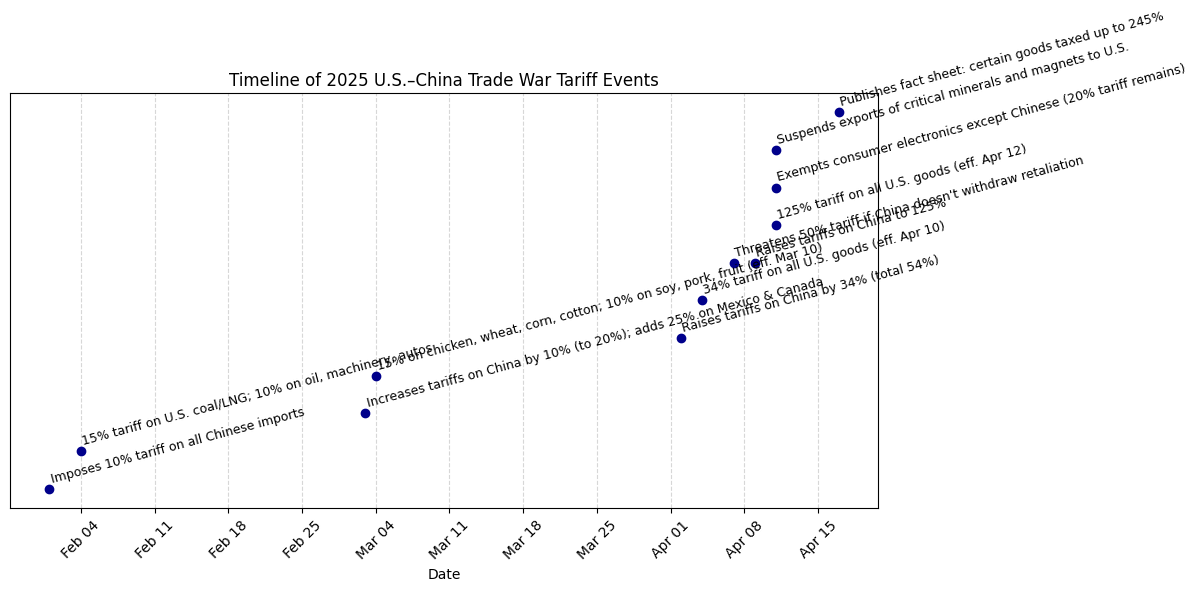

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define the trade war event timeline
timeline_data = [
    {"Date": "2025-02-01", "Country": "U.S.", "Event": "Imposes 10% tariff on all Chinese imports"},
    {"Date": "2025-02-04", "Country": "China", "Event": "15% tariff on U.S. coal/LNG; 10% on oil, machinery, autos"},
    {"Date": "2025-03-03", "Country": "U.S.", "Event": "Increases tariffs on China by 10% (to 20%); adds 25% on Mexico & Canada"},
    {"Date": "2025-03-04", "Country": "China", "Event": "15% on chicken, wheat, corn, cotton; 10% on soy, pork, fruit (eff. Mar 10)"},
    {"Date": "2025-04-02", "Country": "U.S.", "Event": "Raises tariffs on China by 34% (total 54%)"},
    {"Date": "2025-04-04", "Country": "China", "Event": "34% tariff on all U.S. goods (eff. Apr 10)"},
    {"Date": "2025-04-07", "Country": "U.S.", "Event": "Threatens 50% tariff if China doesn't withdraw retaliation"},
    {"Date": "2025-04-09", "Country": "U.S.", "Event": "Raises tariffs on China to 125%"},
    {"Date": "2025-04-11", "Country": "China", "Event": "125% tariff on all U.S. goods (eff. Apr 12)"},
    {"Date": "2025-04-11", "Country": "U.S.", "Event": "Exempts consumer electronics except Chinese (20% tariff remains)"},
    {"Date": "2025-04-11", "Country": "China", "Event": "Suspends exports of critical minerals and magnets to U.S."},
    {"Date": "2025-04-17", "Country": "U.S.", "Event": "Publishes fact sheet: certain goods taxed up to 245%"},
]

# Create DataFrame
timeline_df = pd.DataFrame(timeline_data)
timeline_df["Date"] = pd.to_datetime(timeline_df["Date"])
timeline_df = timeline_df.sort_values("Date").reset_index(drop=True)

# Assign y positions to separate countries
y_positions = []
y = 0
last_country = None
for i, row in timeline_df.iterrows():
    if row["Country"] != last_country:
        y += 1
        last_country = row["Country"]
    y_positions.append(y)

# Plot timeline
plt.figure(figsize=(12, 6))
plt.hlines(y=y_positions, xmin=timeline_df["Date"], xmax=timeline_df["Date"], color="skyblue", linewidth=2)
plt.plot(timeline_df["Date"], y_positions, "o", color="darkblue")

# Annotate each event
for i, row in timeline_df.iterrows():
    plt.text(row["Date"], y_positions[i] + 0.1, row["Event"], fontsize=9, va='bottom', ha='left', rotation=15)

# Format the x-axis
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)

# Final adjustments
plt.title("Timeline of 2025 U.S.–China Trade War Tariff Events")
plt.yticks([])
plt.xlabel("Date")
plt.ylabel("")
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()


*This timeline research is helped by chatGPT*

#3. Data Analysis

###Sector and Industry-Level Performance

Average return by sector

Return variance within each sector

Possibly performance change before vs after key trade war dates (if we have time-series data)

###Company Characteristics vs Market Reactions
From our cleaned dataset, we can explore:

Beta vs Return

Factor Exposure vs Return

Market Cap Category (Small/Mid/Large) vs Return

Employee Count vs Return

###Draw Insights: Which Business Models Were Resilient?
We’ll combine:

Sector (exposure to tariffs)

Factor profile (value, momentum, profitability, etc.)

Size and leverage

Labor structure

This synthesis will help define which business models (e.g., profitable, asset-light, high-momentum tech companies) were most resilient during geopolitical stress.

#4. EDA & Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv("Merged_TradeWar_Cleaned.csv")

# Set plot style
sns.set(style="whitegrid")

##Descriptive Statistics Summary

In [9]:
# Descriptive Statistics
print("📊 Descriptive Statistics:")
print(df.describe().round(2))

📊 Descriptive Statistics:
       Market Cap_meta  Avg D Val Traded 5D:D-5_meta  \
count     1.674000e+03                  1.674000e+03   
mean      5.513610e+10                  4.058360e+08   
std       1.943274e+11                  1.502621e+09   
min       2.219280e+09                  4.506081e+07   
25%       7.801515e+09                  8.410480e+07   
50%       1.646737e+10                  1.484258e+08   
75%       4.339824e+10                  3.207268e+08   
max       3.419474e+12                  3.344130e+10   

       PORT US Sz Fact Exp:D-1_meta  PORT US Prof Fact Exp:D-1_meta  \
count                       1674.00                         1674.00   
mean                          -1.78                           -0.89   
std                            0.96                            0.91   
min                           -3.00                           -3.00   
25%                           -2.47                           -1.25   
50%                           -1.97        

From the summary statistics:

Market Cap ranged from about $2.2B to over $3T, with a strong positive skew, indicating that a few mega-cap firms dominate the market.

Beta (Y-1) had a median near 0.89, with values as high as 4.63, suggesting a broad distribution of market sensitivity across firms.

Total Return (Y-1) had an average of 31.7%, but the standard deviation (~74.5%) indicates wide performance dispersion driven by pre-trade-war market conditions and firm-specific factors.

##Sector Distribution

In [13]:
print(df.columns.tolist())

['Ticker_meta', 'Short Name_meta', 'Market Cap_meta', 'Ticker.1_meta', 'BICS L1 Sect Nm_meta', 'BICS L2 IG Nm_meta', 'BICS L3 Ind Nm_meta', 'Avg D Val Traded 5D:D-5_meta', 'PORT US Sz Fact Exp:D-1_meta', 'PORT US Prof Fact Exp:D-1_meta', 'PORT US Vol Fact Exp:D-1_meta', 'PORT US Trd Act Fact Exp:D-1_meta', 'PORT US Lev Fact Exp:D-1_meta', 'PORT US Mom Fact Exp:D-1_meta', 'PORT US Val Fact Exp:D-1_meta', 'PORT US Gr Fact Exp:D-1_meta', 'PORT US Dvd Yld Fact Exp:D-1_meta', 'PORT US Earn Var Fact Exp:D-1_meta', 'P/S_meta', 'BEst P/S BF12M_meta', 'P/B_meta', 'BEst P/B BF12M_meta', 'P/E_meta', 'BEst P/E BF12M_meta', 'ROE LF_meta', 'GICS Sector_meta', 'GICS Ind_meta', 'GICS SubInd_meta', 'GICS Sector.1_meta', 'GICS Ind Name_meta', 'GICS SubInd Name_meta', 'Beta:Y-1_meta', 'Total Return:Y-1_meta', 'Number of Employees:Y_meta', 'Ticker Symbol', 'Ticker_price', 'Short Name_price', 'Market Cap_price', 'Ticker.1_price', 'BICS L1 Sect Nm_price', 'BICS L2 IG Nm_price', 'BICS L3 Ind Nm_price', 'Avg 

/tmp/ipython-input-3261514679.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


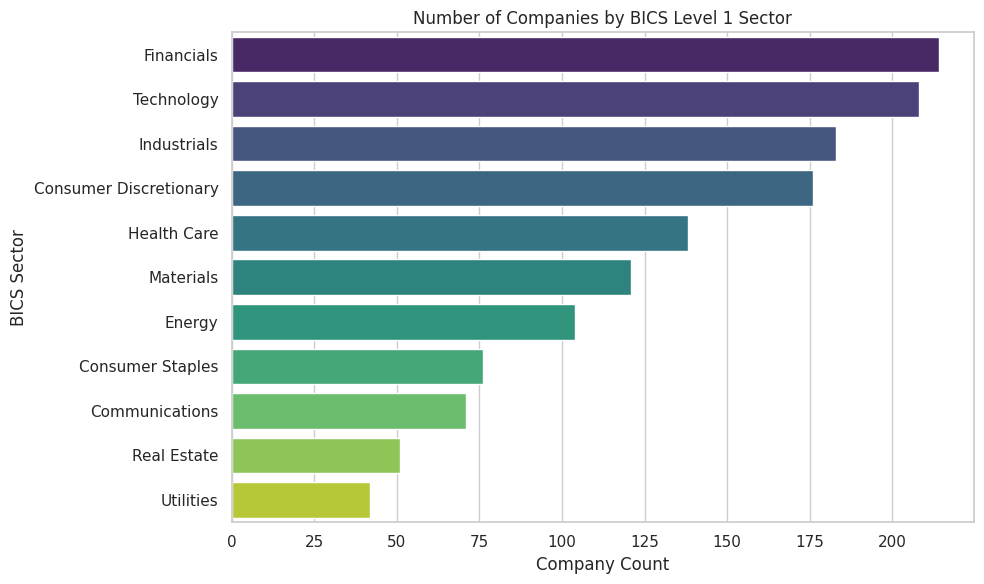

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

bics_col = "BICS L1 Sect Nm_meta"

sector_counts = (
    df[bics_col]
    .dropna()
    .value_counts()
    .reset_index()
)

sector_counts.columns = ["BICS Sector", "Company Count"]

plt.figure(figsize=(10, 6))
sns.barplot(
    data=sector_counts,
    x="Company Count",
    y="BICS Sector",
    palette="viridis"
)

plt.title("Number of Companies by BICS Level 1 Sector")
plt.xlabel("Company Count")
plt.ylabel("BICS Sector")
plt.tight_layout()
plt.show()


Sector-wise Company Distribution (BICS Level 1):

This chart displays the number of companies across BICS Level 1 sectors in the dataset, providing a view of sector representation before analyzing trade war performance.

Key observations:

- Financials and Technology have the highest number of firms, indicating broad sector coverage and diversification within these industries.

- Industrials and Consumer Discretionary also show strong representation, reflecting their large footprint in U.S. equity markets and global supply chains.

- Health Care maintains a solid presence, suggesting its importance as both a defensive and innovation-driven sector.

- Materials and Energy have moderate representation, consistent with their more specialized and capital-intensive nature.

- Utilities and Real Estate contain the fewest companies, reflecting their regulated structure and relatively concentrated industry composition.

Insight: Sector representation matters because highly populated sectors may exhibit greater dispersion in performance during trade shocks, while smaller sectors may show more uniform reactions. This distribution sets the foundation for later analysis comparing sector-level returns, volatility, and resilience during the 2025 trade war.

##Market Capitalization Distribution

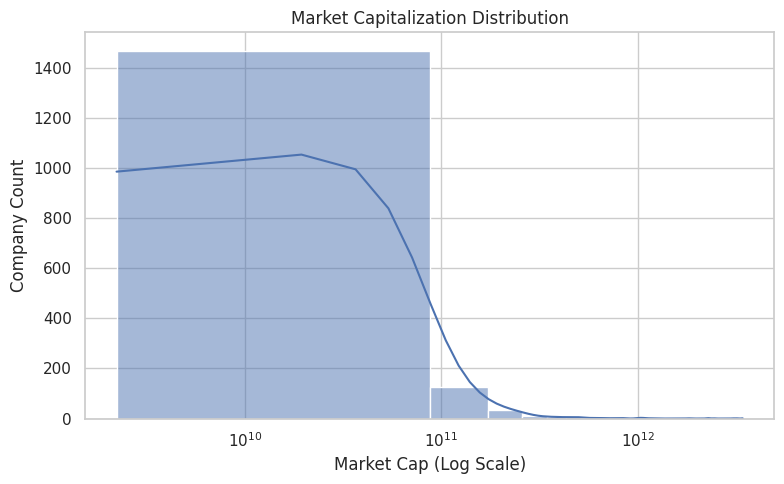

In [17]:
# Market Capitalization Distribution

plt.figure(figsize=(8, 5))

sns.histplot(
    pd.to_numeric(df['Market Cap_meta'], errors='coerce'),
    bins=40,
    kde=True
)

plt.title('Market Capitalization Distribution')
plt.xlabel('Market Cap (Log Scale)')
plt.ylabel('Company Count')
plt.xscale('log')
plt.tight_layout()
plt.show()


The market capitalization distribution is highly right-skewed, with most firms clustered in the small- to mid-cap range and a small number of mega-cap companies dominating the upper tail.

This imbalance highlights why analyzing trade war impacts by size category is important, as large firms may have greater pricing power and supply-chain flexibility than smaller companies.



##Market Cap Tier Analysis

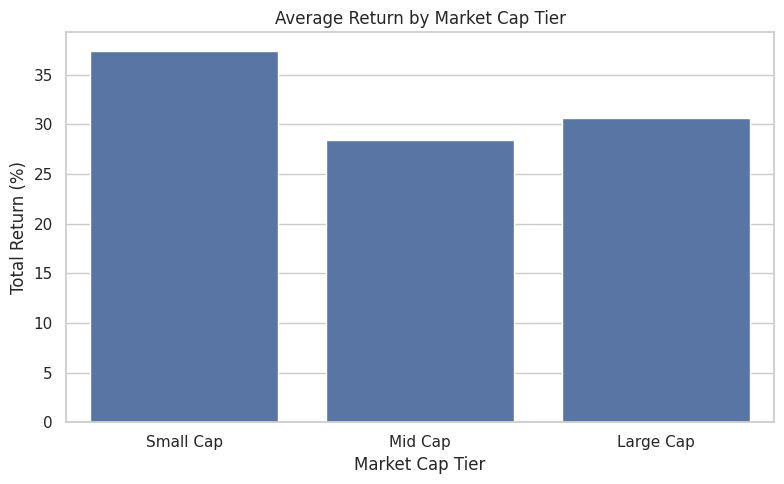

In [20]:
# Create market cap tiers
df['MarketCapTier'] = pd.qcut(
    df['Market Cap_meta'],
    q=[0, 0.33, 0.67, 1.0],
    labels=['Small Cap', 'Mid Cap', 'Large Cap']
)

# Average return by market cap tier
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x='MarketCapTier',
    y='Total Return:Y-1_meta',
    errorbar=None
)
plt.title('Average Return by Market Cap Tier')
plt.xlabel('Market Cap Tier')
plt.ylabel('Total Return (%)')
plt.tight_layout()
plt.show()



Small-cap firms outperformed mid- and large-cap companies in the pre-trade-war period, suggesting higher growth potential and risk appetite prior to the policy shock. These differences provide useful context for later evaluating whether firm size influenced resilience during the trade war.

##Beta (Y-1) Distribution

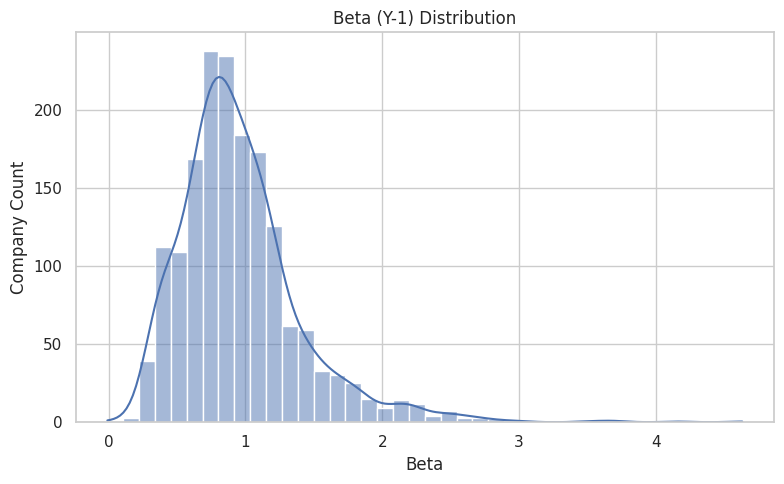

In [22]:
# Beta (Y-1) Distribution

plt.figure(figsize=(8, 5))

sns.histplot(
    pd.to_numeric(df['Beta:Y-1_meta'], errors='coerce'),
    bins=40,
    kde=True
)

plt.title('Beta (Y-1) Distribution')
plt.xlabel('Beta')
plt.ylabel('Company Count')
plt.tight_layout()
plt.show()


The Beta (Y-1) distribution reflects companies’ market sensitivity prior to the 2025 trade war, serving as an ex-ante risk measure rather than an outcome. Most firms cluster around a beta near 1, indicating average market exposure before the policy shock. This distribution provides important baseline context for understanding how pre-existing risk profiles may interact with subsequent trade war performance, but it does not by itself demonstrate differential impact from the trade war.

##Beta vs Total Return

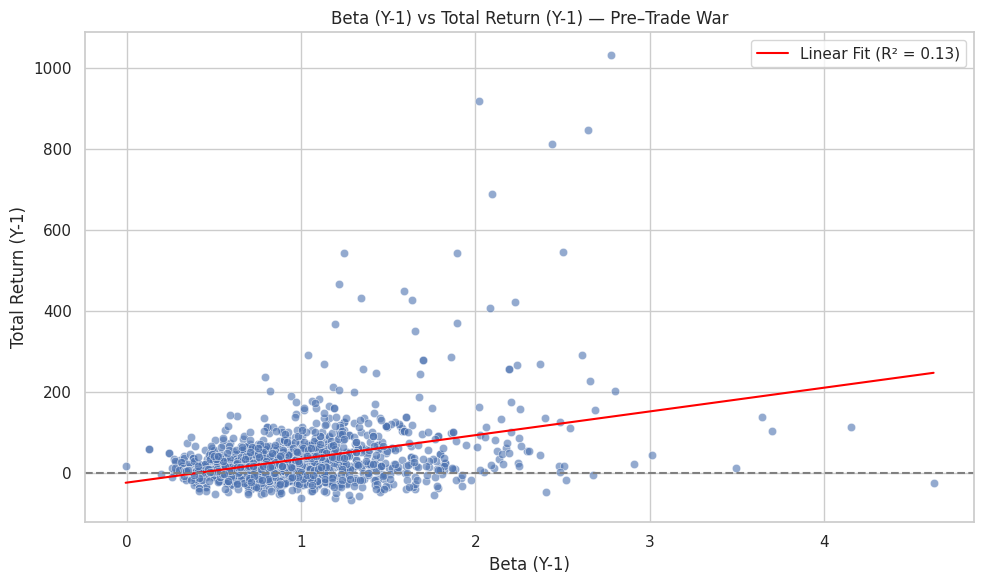

In [24]:
from scipy.stats import linregress
import numpy as np

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x='Beta:Y-1_meta',
    y='Total Return:Y-1_meta',
    alpha=0.6
)

# Regression line
valid = df[['Beta:Y-1_meta', 'Total Return:Y-1_meta']].dropna()
slope, intercept, r_value, p_value, std_err = linregress(
    valid['Beta:Y-1_meta'],
    valid['Total Return:Y-1_meta']
)

x_vals = np.linspace(valid['Beta:Y-1_meta'].min(), valid['Beta:Y-1_meta'].max(), 100)
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', label=f'Linear Fit (R² = {r_value**2:.2f})')

plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Beta (Y-1)')
plt.ylabel('Total Return (Y-1)')
plt.title('Beta (Y-1) vs Total Return (Y-1) — Pre–Trade War')
plt.legend()
plt.tight_layout()
plt.show()



This scatter plot examines the relationship between beta measured prior to the 2025 trade war and total returns in the same pre-trade-war period. The fitted regression line shows a weak positive relationship, with a low explanatory power (R² ≈ 0.13), indicating that market beta alone explains little of the cross-sectional variation in returns.

While higher-beta firms tended to exhibit slightly higher average returns, the wide dispersion highlights that firm-specific factors dominated performance before the trade war. Importantly, this figure does not demonstrate trade-war impact; rather, it establishes beta as a baseline risk characteristic that can be used to assess whether higher-risk firms were subsequently more vulnerable once trade tensions escalated.

##Factor Exposure vs Total Return (Y-1)Correlation Heatmap

---



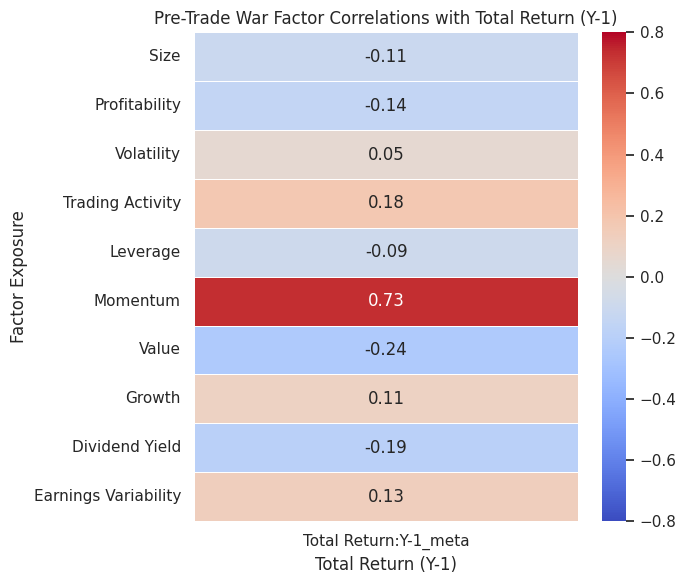

In [27]:
# Factor Exposure vs Total Return (Y-1) Correlation Heatmap

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1) Define the return column (pre–trade war)
ret_col = "Total Return:Y-1_meta"

# 2) Select factor exposure columns (pre–trade war) from the merged dataset
factor_cols = [c for c in df.columns if "Fact Exp" in c and c.endswith("_meta")]

# 3) Build correlation matrix (factors + return)
subset = df[factor_cols + [ret_col]].copy()
corr_matrix = subset.corr(numeric_only=True)

# 4) Extract factor-to-return correlations (a single-column table)
heatmap_data = corr_matrix[[ret_col]].drop(index=ret_col)

# 5) Clean Bloomberg factor names for readability
clean_labels = {
    "PORT US Sz Fact Exp:D-1_meta": "Size",
    "PORT US Prof Fact Exp:D-1_meta": "Profitability",
    "PORT US Vol Fact Exp:D-1_meta": "Volatility",
    "PORT US Trd Act Fact Exp:D-1_meta": "Trading Activity",
    "PORT US Lev Fact Exp:D-1_meta": "Leverage",
    "PORT US Mom Fact Exp:D-1_meta": "Momentum",
    "PORT US Val Fact Exp:D-1_meta": "Value",
    "PORT US Gr Fact Exp:D-1_meta": "Growth",
    "PORT US Dvd Yld Fact Exp:D-1_meta": "Dividend Yield",
    "PORT US Earn Var Fact Exp:D-1_meta": "Earnings Variability",
}

# Replace index labels where mapping exists, otherwise keep original
heatmap_data.index = [clean_labels.get(idx, idx) for idx in heatmap_data.index]

# 6) Plot heatmap with fixed symmetric color scale so small correlations are visible
plt.figure(figsize=(7, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="coolwarm",
    center=0,
    vmin=-0.8,
    vmax=0.8,
    fmt=".2f",
    linewidths=0.5
)

plt.title("Pre-Trade War Factor Correlations with Total Return (Y-1)", fontsize=12)
plt.ylabel("Factor Exposure")
plt.xlabel("Total Return (Y-1)")
plt.tight_layout()
plt.show()



This heatmap shows the pre-trade war correlations between factor exposures and Total Return (Y-1). Because both factor exposures and returns are measured before the 2025 trade war, the results reflect baseline investor preferences and risk pricing, not reactions to the trade war itself.

Key insights:

- Momentum shows a very strong positive correlation (0.73) with total return.
This indicates that stocks with strong recent price momentum significantly outperformed in the year leading up to the trade war. Investors were clearly rewarding trend-following behavior prior to the geopolitical shock.

- Value (-0.24) and Dividend Yield (-0.19) are negatively correlated with returns.
This suggests that cheaper, income-oriented stocks underperformed growth- and momentum-oriented names during the pre-trade war period, consistent with a risk-on market environment.

- Profitability (-0.14) and Size (-0.11) show mild negative relationships with return.
Larger and more profitable firms did not necessarily deliver higher returns before the trade war, implying that market performance was driven more by market sentiment and positioning than by fundamentals.

- Trading Activity (0.18) and Earnings Variability (0.13) show modest positive correlations.
Stocks with higher turnover and more variable earnings tended to outperform, reflecting investor willingness to take on higher uncertainty during this period.

- Volatility (0.05) has almost no correlation with returns.
This indicates that volatility alone was not a major driver of performance prior to the trade war.

Takeaway:

Before the trade war began, returns were strongly driven by momentum rather than traditional defensive or value characteristics. This matters for the broader analysis because it establishes a baseline market regime. Any performance shifts observed during or after the trade war should be interpreted relative to this pre-shock environment, where investors favored momentum-driven, risk-seeking strategies over stability or income.


##Total Return (Y-1) Distribution

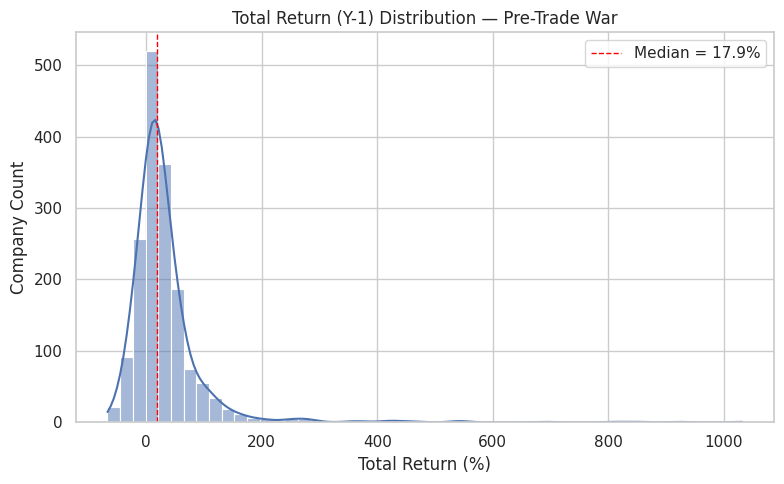

In [28]:
# Total Return (Y-1) Distribution

# Ensure Total Return is numeric
df['Total Return:Y-1_meta'] = pd.to_numeric(
    df['Total Return:Y-1_meta'],
    errors='coerce'
)

# Drop missing values for plotting
return_data = df['Total Return:Y-1_meta'].dropna()

# Plot distribution
plt.figure(figsize=(8, 5))

sns.histplot(
    return_data,
    bins=50,
    kde=True
)

# Add median reference line
plt.axvline(
    return_data.median(),
    color='red',
    linestyle='--',
    linewidth=1,
    label=f"Median = {return_data.median():.1f}%"
)

plt.title('Total Return (Y-1) Distribution — Pre-Trade War')
plt.xlabel('Total Return (%)')
plt.ylabel('Company Count')
plt.legend()
plt.tight_layout()
plt.show()


The pre-trade war return distribution is strongly right-skewed, with most companies clustered around modest positive returns and a median return of approximately 18%. A small number of firms experienced extremely large gains, creating a long right tail that pulls the mean upward and highlights substantial performance dispersion across companies.

This pattern indicates that outperformance prior to the trade war was highly concentrated, driven by firm-specific factors rather than broad market conditions. As a result, average returns alone would be misleading, reinforcing the importance of examining medians, dispersion, and cross-sectional characteristics when assessing vulnerability and resilience heading into the trade war period.

## Employee Count vs Total Return (Bubble Plot)

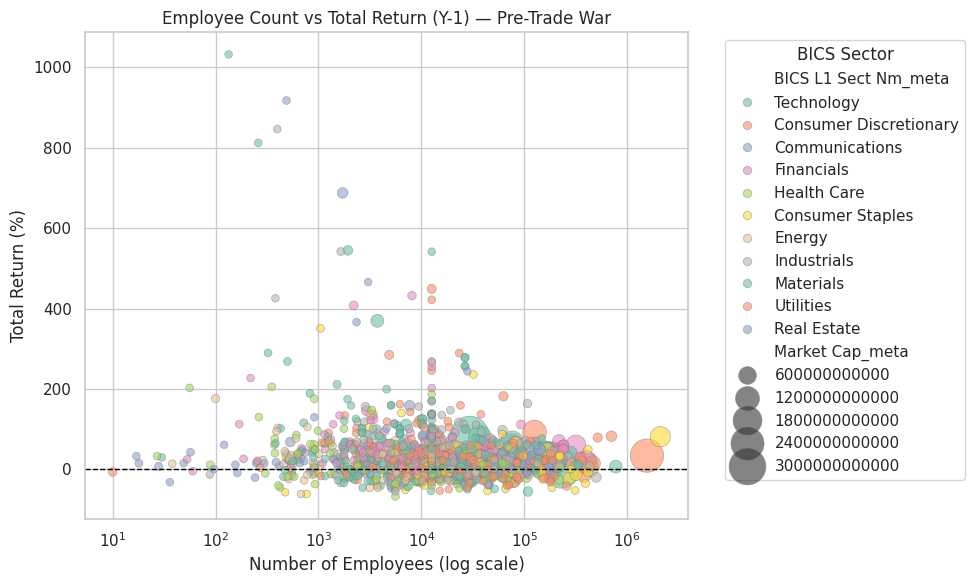

In [30]:

# Ensure numeric columns
df['Number of Employees:Y_meta'] = pd.to_numeric(
    df['Number of Employees:Y_meta'], errors='coerce'
)
df['Total Return:Y-1_meta'] = pd.to_numeric(
    df['Total Return:Y-1_meta'], errors='coerce'
)
df['Market Cap_meta'] = pd.to_numeric(
    df['Market Cap_meta'], errors='coerce'
)

# Drop rows with missing key values
bubble_df = df.dropna(subset=[
    'Number of Employees:Y_meta',
    'Total Return:Y-1_meta',
    'Market Cap_meta',
    'BICS L1 Sect Nm_meta'
])

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=bubble_df,
    x='Number of Employees:Y_meta',
    y='Total Return:Y-1_meta',
    size='Market Cap_meta',
    hue='BICS L1 Sect Nm_meta',
    sizes=(30, 800),
    alpha=0.6,
    edgecolor='gray',
    linewidth=0.5,
    palette='Set2'
)

plt.xscale('log')
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.title('Employee Count vs Total Return (Y-1) — Pre-Trade War')
plt.xlabel('Number of Employees (log scale)')
plt.ylabel('Total Return (%)')
plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    title='BICS Sector'
)

plt.tight_layout()
plt.show()



This bubble plot shows no strong linear relationship between company size by employee count and pre-trade war returns. High and low returns are observed across the full range of workforce sizes, indicating that labor scale alone was not a reliable predictor of performance entering the trade war period.

However, sectoral patterns emerge: Technology and Consumer Discretionary firms exhibit greater dispersion in returns, including several high-performing outliers, while traditionally labor-intensive sectors such as Industrials and Utilities cluster more tightly around modest returns. Larger market-cap firms (larger bubbles) tend to appear in the mid-return range, suggesting that scale may provide stability rather than outsized upside.

**Key takeaway:** Workforce size does not determine returns on its own, but when combined with sector characteristics and business models, it helps explain differences in resilience ahead of geopolitical shocks.

##Factor Exposure Distributions

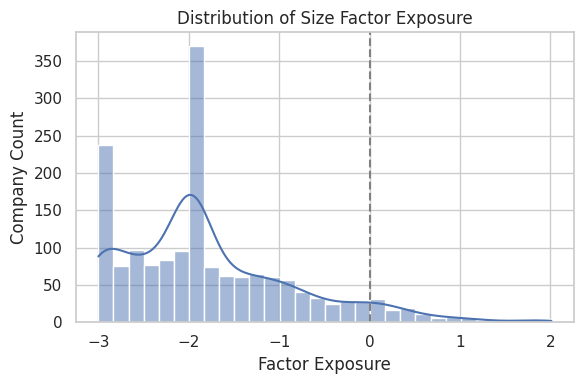

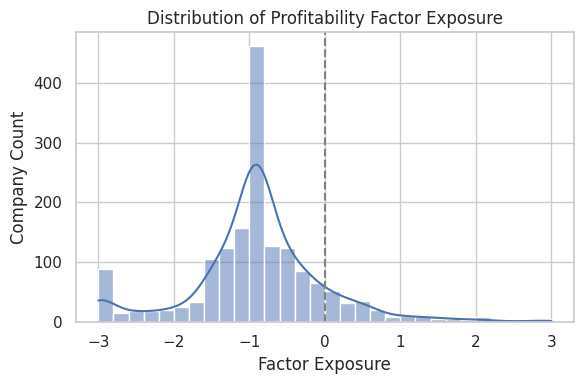

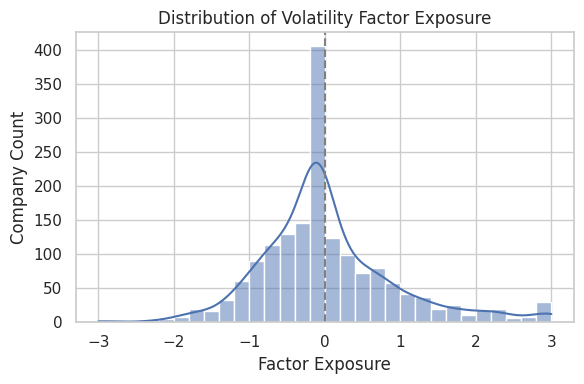

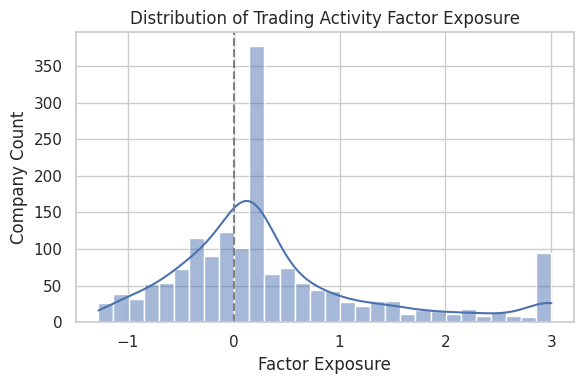

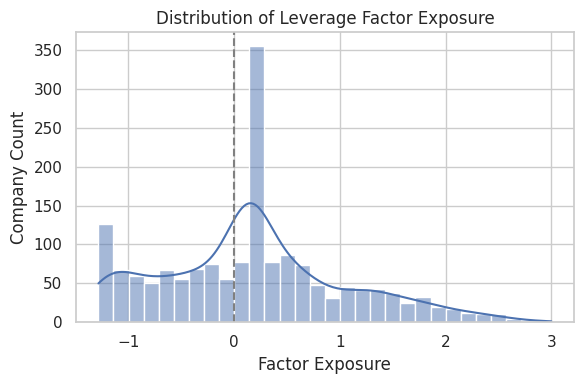

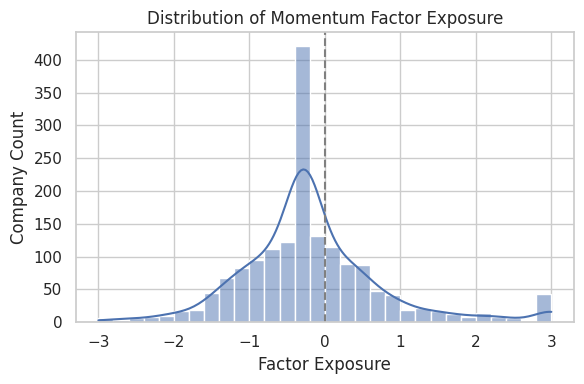

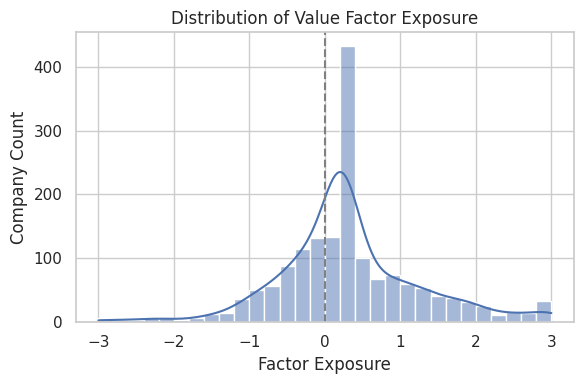

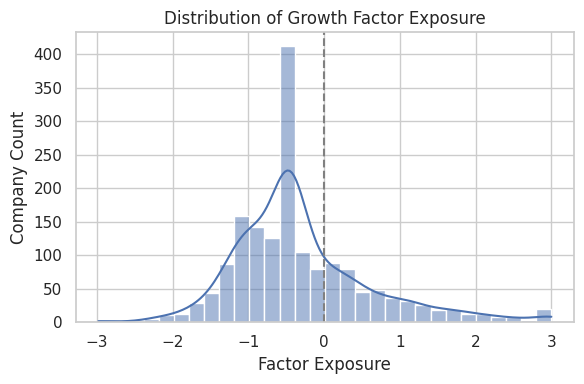

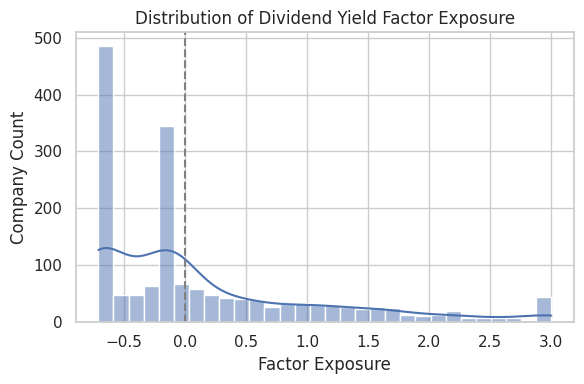

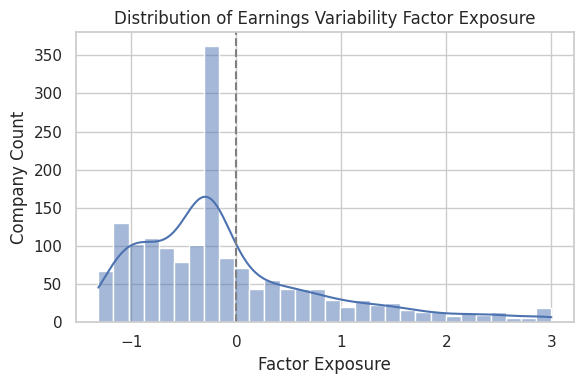

In [32]:
# Factor Exposure Distributions
factor_labels = {
    'PORT US Sz Fact Exp:D-1_meta': 'Size',
    'PORT US Prof Fact Exp:D-1_meta': 'Profitability',
    'PORT US Vol Fact Exp:D-1_meta': 'Volatility',
    'PORT US Trd Act Fact Exp:D-1_meta': 'Trading Activity',
    'PORT US Lev Fact Exp:D-1_meta': 'Leverage',
    'PORT US Mom Fact Exp:D-1_meta': 'Momentum',
    'PORT US Val Fact Exp:D-1_meta': 'Value',
    'PORT US Gr Fact Exp:D-1_meta': 'Growth',
    'PORT US Dvd Yld Fact Exp:D-1_meta': 'Dividend Yield',
    'PORT US Earn Var Fact Exp:D-1_meta': 'Earnings Variability'
}

# Select factor exposure columns (pre–trade war)
factor_cols = list(factor_labels.keys())

for col in factor_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(pd.to_numeric(df[col], errors='coerce'), bins=30, kde=True)
    plt.axvline(0, color='gray', linestyle='--')
    plt.title(f'Distribution of {factor_labels[col]} Factor Exposure')
    plt.xlabel('Factor Exposure')
    plt.ylabel('Company Count')
    plt.tight_layout()
    plt.show()


Factor exposures are approximately centered around zero with meaningful dispersion, indicating a balanced cross-section of firms across factor styles prior to the trade war.

##Factor Correlation Matrix


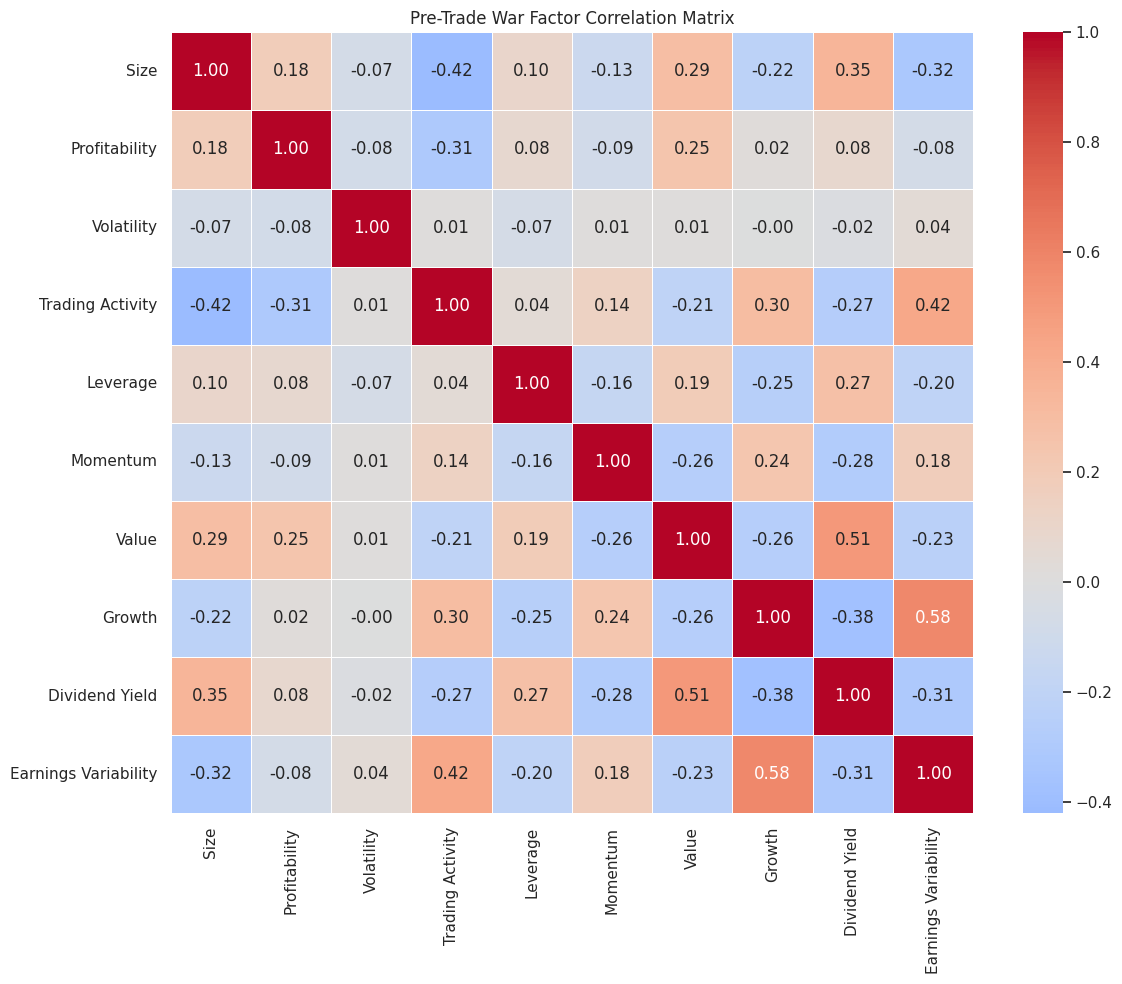

In [33]:
# Correlation Matrix of Factors
factor_df = df[factor_cols].apply(pd.to_numeric, errors='coerce')

# Compute correlation matrix
corr_matrix = factor_df.corr()

# Rename axes
corr_matrix.rename(index=factor_labels, columns=factor_labels, inplace=True)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Pre-Trade War Factor Correlation Matrix")
plt.tight_layout()
plt.show()

This heatmap shows correlations among factor exposures measured prior to the 2025 trade war.
Overall, factor correlations are moderate, indicating limited multicollinearity. Expected relationships such as the negative correlation between Value and Growth and the positive relationship between Value and Dividend Yield are clearly visible.
This confirms that factor exposures capture distinct firm characteristics, allowing for meaningful interpretation of factor–return relationships in subsequent analysis.



#5. Comprehensive Conclusion

##Synthesis of Findings
This analysis synthesizes firm characteristics, factor exposures, and return behavior to construct a coherent picture of how U.S. equities were positioned heading into the 2025 U.S.–China trade war. By focusing on pre-trade-war metrics, the results establish a critical baseline that allows subsequent performance during the trade war to be interpreted as a reaction to policy shocks rather than pre-existing market conditions.

##The Story Revealed by the Data

Across all visualizations, a consistent narrative emerges: the market entering the trade war was strongly momentum-driven and risk-seeking.

Returns in the pre-trade-war period were highly concentrated, with a small subset of firms generating extreme gains while the majority experienced modest positive returns. This right-skewed distribution indicates that performance was not broadly shared and that averages alone obscure meaningful cross-sectional differences. Instead, outcomes were driven by firm-specific positioning rather than sector-wide fundamentals.

Company size analysis shows that small-cap firms outperformed mid- and large-cap firms, reflecting investor preference for growth-oriented and higher-risk opportunities before trade tensions escalated. Large-cap firms exhibited more stable but lower returns, suggesting that scale provided downside protection but limited upside in a risk-on environment.

Risk exposure, as measured by Beta (Y-1), played only a limited role in explaining returns. While higher-beta firms earned slightly higher average returns, the weak explanatory power confirms that systematic market risk alone did not drive performance. This reinforces the importance of examining factor exposures and business models rather than relying solely on traditional risk metrics.

Factor analysis provides the strongest insight into investor behavior. Momentum exhibited a very strong positive correlation with returns, clearly dominating all other factors. In contrast, value, dividend yield, and profitability were negatively correlated with performance, indicating that defensive and income-oriented strategies were out of favor. Growth, trading activity, and earnings variability showed modest positive relationships, further reinforcing the market’s appetite for risk and uncertainty ahead of the trade war.

Employment analysis adds structural context. Workforce size did not predict returns directly, but sectoral patterns were evident. Technology and consumer-facing firms showed greater dispersion and upside potential, while labor-intensive and regulated sectors clustered around moderate returns. This suggests that flexibility and business model scalability, rather than sheer size, mattered more in the pre-shock environment.

##Connecting the Analysis into Actionable Insights

Taken together, the evidence suggests that the market entered the trade war from a position of elevated risk-taking and momentum concentration. Investors were rewarded for trend-following behavior and penalized for defensive positioning. This context is crucial: once trade tensions intensified, firms that relied on continued momentum and optimistic growth assumptions were likely more exposed to abrupt reversals.

By establishing this baseline, the analysis highlights which characteristics may signal vulnerability or resilience during geopolitical disruptions. Firms with strong momentum but weak fundamentals may face sharper drawdowns, while companies with stable cash flows, pricing power, and diversified operations may gain relative advantage once uncertainty rises.

---

##Recommendations for Portfolio Managers

Based on these findings, several actionable recommendations emerge:

Avoid Overreliance on Momentum in Geopolitical Risk Periods
Momentum was the dominant driver of returns before the trade war, but such concentration increases downside risk when policy shocks occur. Portfolio managers should monitor momentum exposure closely and consider reducing it as geopolitical uncertainty escalates.

Rebalance Toward Quality and Stability During Trade Shocks
Although value and dividend-oriented stocks underperformed pre-trade-war, these characteristics may offer resilience during periods of policy-driven volatility. Gradual rotation toward firms with strong balance sheets, stable earnings, and pricing power can improve downside protection.

Use Size as a Risk-Management Tool, Not a Return Engine
Small-cap firms delivered higher upside pre-trade-war but are likely more sensitive to supply-chain disruptions and tariff exposure. Large-cap firms, while less explosive, may provide stability during prolonged trade conflicts. A balanced size allocation is preferable to aggressive small-cap tilts.

Incorporate Business Model and Sector Context
Employment structure and sector affiliation matter when combined with factor exposure. Asset-light, scalable business models may adapt more easily to trade disruptions than labor-intensive or heavily regulated industries.

Treat Beta as a Baseline, Not a Forecast
Beta alone does not explain cross-sectional performance. Portfolio decisions should integrate factor profiles, sector exposure, and firm fundamentals rather than relying on market sensitivity metrics in isolation.

---

##Final Takeaway

The pre-trade-war equity market was shaped by optimism, momentum, and risk-seeking behavior. This analysis shows that understanding how firms were positioned before the shock is essential for interpreting their performance during the trade war. For portfolio managers, the key lesson is clear: geopolitical risk demands a shift from return-chasing strategies toward disciplined, diversified, and structurally resilient portfolios.